In [1]:
!where python 

c:\Users\LENOVO\Desktop\Disease Prediction\myenv\Scripts\python.exe
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\python.exe
C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data_df=pd.read_csv("heart.csv")

Data Representation

In [4]:
data_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data_df.shape

(918, 12)

In [6]:
data_df.columns=data_df.columns.str.lower()

In [7]:
data_df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


DATA PREPROCESSING
- Handling Null value
- Encoding Categorical Value
- feature scaling
- handling ouliers

Handling of missing data

In [9]:
data_df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

The data has not null values

In [10]:
data_df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From above we understoond that , cholsterol,maxhr,restingbp needs to be normalise

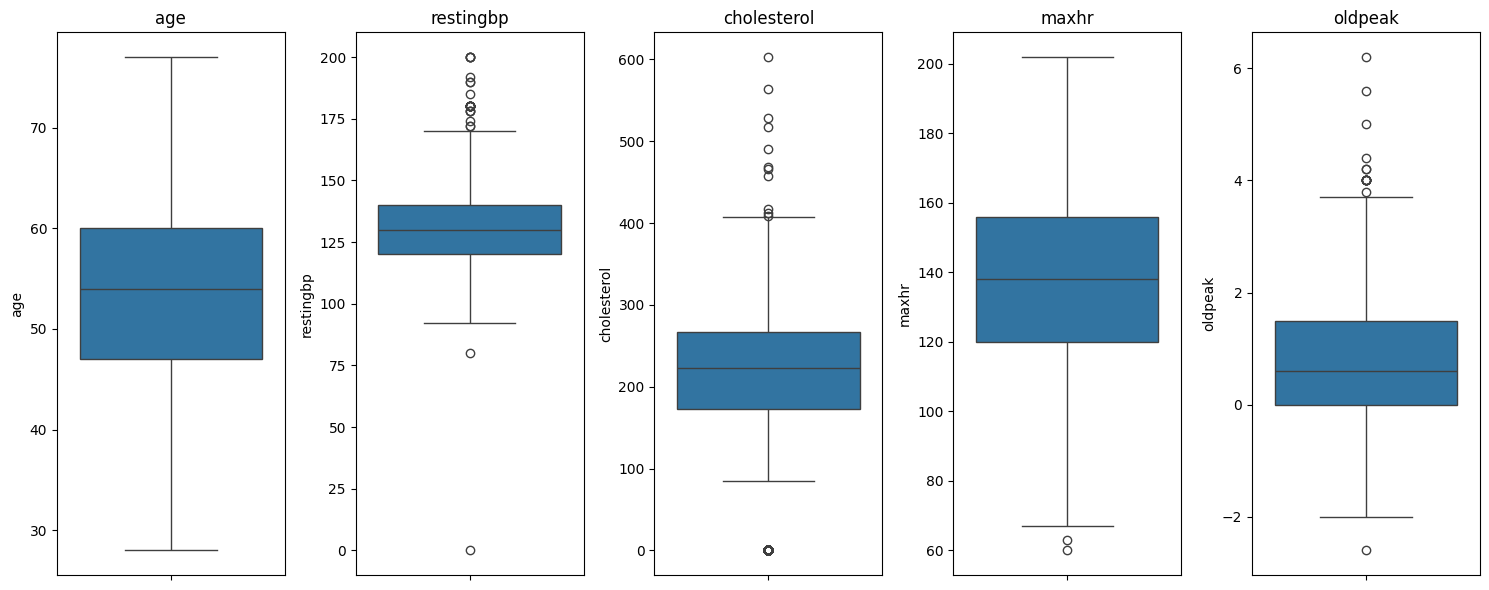

In [11]:
numerical_cols=['age','restingbp','cholesterol','maxhr','oldpeak']

plt.figure(figsize=(15,6))

for i,col in enumerate(numerical_cols,1):
    plt.subplot(1,len(numerical_cols),i)
    sns.boxplot(y=data_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()    

In [12]:
data_df['cholesterol'].value_counts()

cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [13]:
data_df['cholesterol']=data_df['cholesterol'].replace(0,data_df['cholesterol'].median())

In [14]:
data_df['cholesterol'].value_counts()

cholesterol
223    182
254     11
220     10
230      9
211      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 221, dtype: int64

EDA

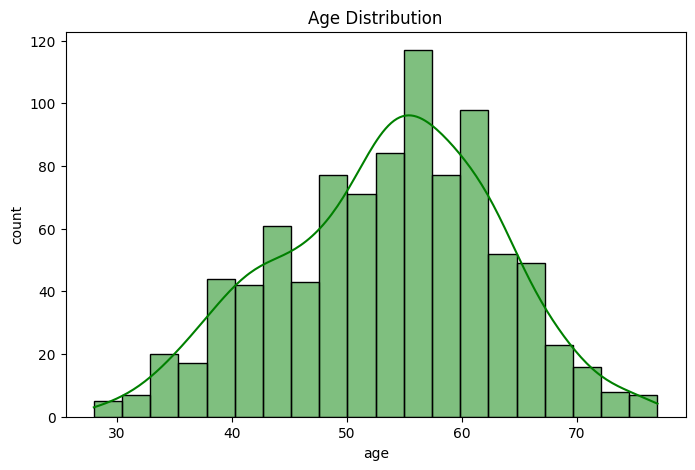

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data_df['age'],bins=20,kde=True,color='green')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Distribution')
plt.show()

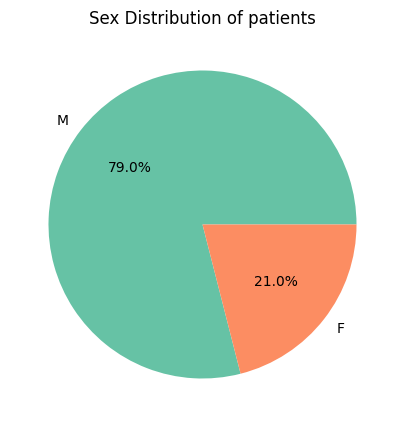

In [19]:
sex_counts=data_df['sex'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(sex_counts.values,labels=sex_counts.index,autopct='%1.1f%%',colors=sns.set_palette('Set2'))

plt.title("Sex Distribution of patients") 

plt.show()

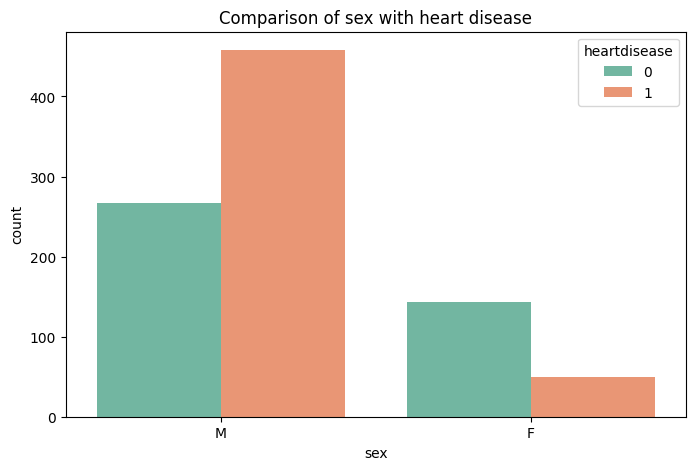

In [34]:
plt.figure(figsize=(8,5))

sns.countplot(x='sex',hue='heartdisease',data=data_df,palette='Set2')
plt.xlabel('sex')
plt.ylabel('count')
plt.title('Comparison of sex with heart disease')
plt.show()

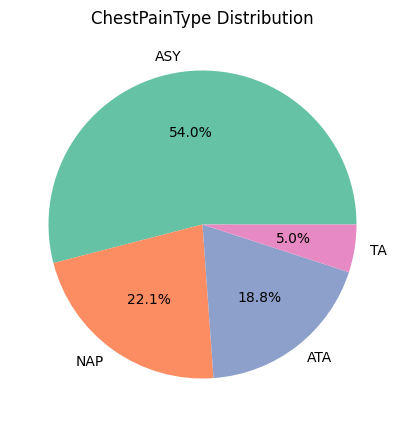

In [20]:
chestpaintype_counts=data_df['chestpaintype'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(chestpaintype_counts.values,labels=chestpaintype_counts.index,autopct='%1.1f%%',colors=sns.set_palette("Set2"))
plt.title("ChestPainType Distribution")
plt.show()

ValueError: 'set2' is not a valid palette name

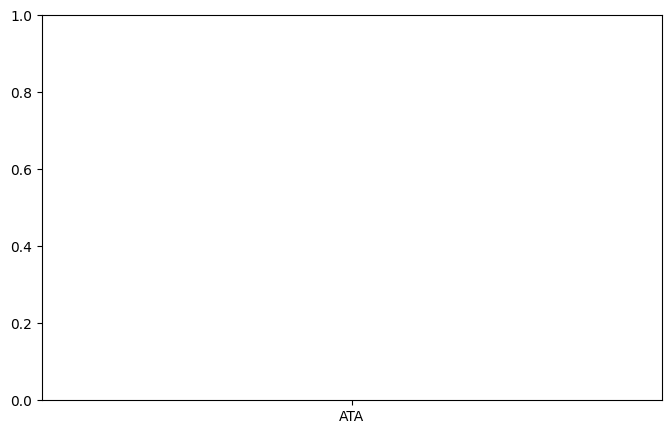

In [35]:
plt.figure(figsize=(8,5))

sns.countplot(x='chestpaintype',hue='heartdisease',data=data_df,palette='et2')
plt.xlabel('ChestPainType')
plt.ylabel('counts')
plt.show()

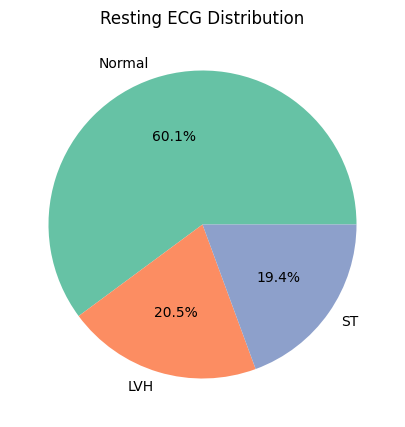

In [27]:
restingecg_counts=data_df['restingecg'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(restingecg_counts.values,labels=restingecg_counts.index,autopct='%1.1f%%',colors=sns.set_palette("Set2"))
plt.title("Resting ECG Distribution")
plt.show()

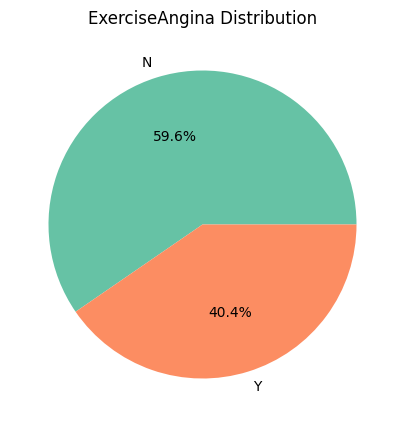

In [29]:
ExerciseAngina_counts = data_df["exerciseangina"].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(ExerciseAngina_counts.values, labels=ExerciseAngina_counts.index, autopct='%1.1f%%',colors=sns.set_palette("Set2"))
plt.title("ExerciseAngina Distribution")
plt.show()

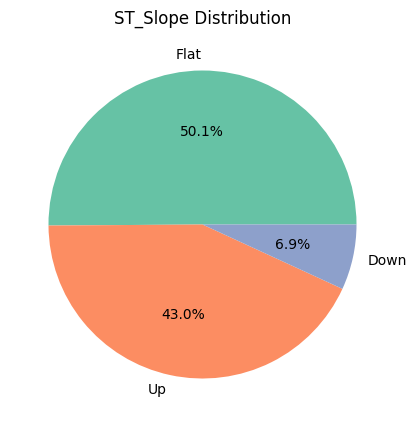

In [30]:
ST_Slope_counts = data_df["st_slope"].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(ST_Slope_counts.values, labels=ST_Slope_counts.index, autopct='%1.1f%%',colors=sns.set_palette("Set2"))
plt.title("ST_Slope Distribution")
plt.show()

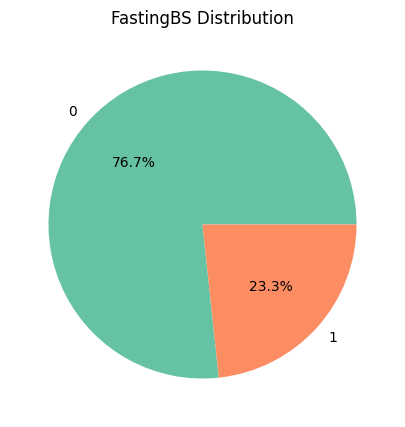

In [32]:
FastingBS_counts = data_df["fastingbs"].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(FastingBS_counts.values, labels=FastingBS_counts.index, autopct='%1.1f%%',colors=sns.set_palette("Set2"))
plt.title("FastingBS Distribution")
plt.show()

label encoding for the restingecg

In [31]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
columns = ['sex', 'chestpaintype', 'restingecg', 'exerciseangina','st_slope']

# Initialize a LabelEncoder instance for each column
for col in columns:
    le = LabelEncoder()
    data_df[col] = le.fit_transform(data_df[col])





In [32]:
data_df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

Since our traget variable is already encoded, as 1 means has heart disease,0 means no

Handling Outliers

In [33]:
numerical_columns = ['cholesterol', 'maxhr', 'restingbp'] 

for col in numerical_columns:
    Q1=data_df[col].quantile(0.25)
    Q3=data_df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    data_df[col]=data_df[col].apply(lambda x: data_df[col].median() if x < lower_bound or x > upper_bound else x)

In [34]:
data_df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

From the above result we can conclude that , there are no potential outliers in the dataset

Feature Scaling

Check for the distribution

In [35]:
data_df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

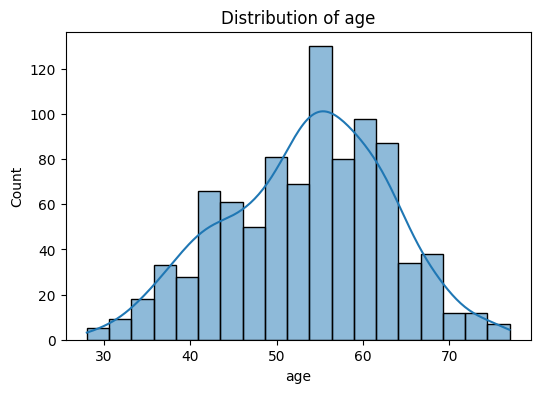

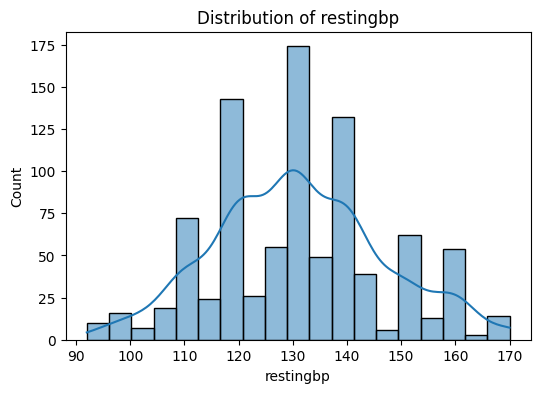

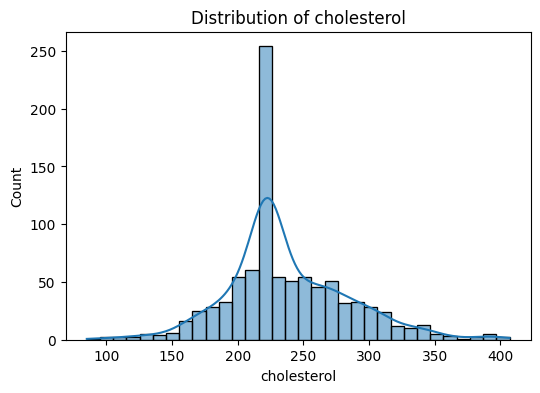

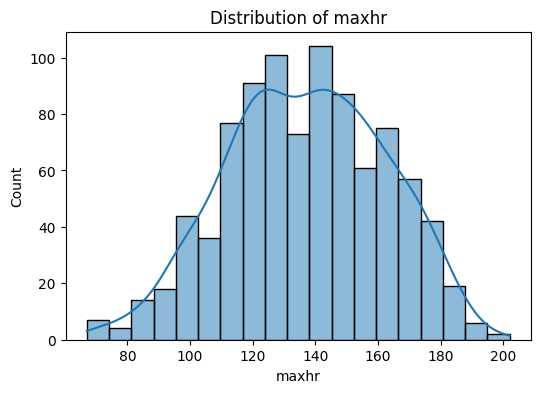

In [37]:

columns_to_scale=['age','restingbp','cholesterol','maxhr']

for col in columns_to_scale:
    plt.figure(figsize=(6,4))
    sns.histplot(data_df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [38]:
data_df.dtypes

age                 int64
sex                 int64
chestpaintype       int64
restingbp         float64
cholesterol       float64
fastingbs           int64
restingecg          int64
maxhr             float64
exerciseangina      int64
oldpeak           float64
st_slope            int64
heartdisease        int64
dtype: object

In [39]:
print("Missing values BEFORE scaling:\n", data_df.isnull().sum())


Missing values BEFORE scaling:
 age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64


In [41]:
print("Standard deviation of each feature:\n", data_df.std())

Standard deviation of each feature:
 age                9.432617
sex                0.407701
chestpaintype      0.956519
restingbp         15.597206
cholesterol       46.339984
fastingbs          0.423046
restingecg         0.631671
maxhr             25.215656
exerciseangina     0.490992
oldpeak            1.066570
st_slope           0.607056
heartdisease       0.497414
dtype: float64


In [43]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns only
columns_to_scale = ['age', 'restingbp', 'cholesterol', 'maxhr']

scaler = StandardScaler()
data_df[columns_to_scale] = scaler.fit_transform(data_df[columns_to_scale])



In [44]:
data_df.describe()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
count,9.180000e+02,918.000000,918.000000,9.180000e+02,9.180000e+02,918.000000,918.000000,9.180000e+02,918.000000,918.000000,918.000000,918.000000
mean,-1.083616e-16,0.789760,0.781046,-6.192094e-16,1.702826e-16,0.233115,0.989107,-2.167233e-16,0.404139,0.887364,1.361656,0.553377
std,1.000545e+00,0.407701,0.956519,1.000545e+00,1.000545e+00,0.423046,0.631671,1.000545e+00,0.490992,1.066570,0.607056,0.497414
min,-2.706015e+00,0.000000,0.000000,-2.506912e+00,-3.291442e+00,0.000000,0.000000,-2.776615e+00,0.000000,-2.600000,0.000000,0.000000
25%,-6.906294e-01,1.000000,0.000000,-7.107401e-01,-5.061513e-01,0.000000,1.000000,-6.736009e-01,0.000000,0.000000,1.000000,0.000000
50%,5.188098e-02,1.000000,0.000000,-6.925017e-02,-3.118287e-01,0.000000,1.000000,4.063044e-02,0.000000,0.600000,1.000000,1.000000
75%,6.883185e-01,1.000000,2.000000,5.722398e-01,5.734186e-01,0.000000,1.000000,7.548618e-01,1.000000,1.500000,2.000000,1.000000
max,2.491558e+00,1.000000,3.000000,2.496710e+00,3.660989e+00,1.000000,2.000000,2.580120e+00,1.000000,6.200000,2.000000,1.000000


after scaling the mean and the standard deviation of those columns have become  close to (0 and 1)

Feature Selection

1.1 Check Feature importance using correlation

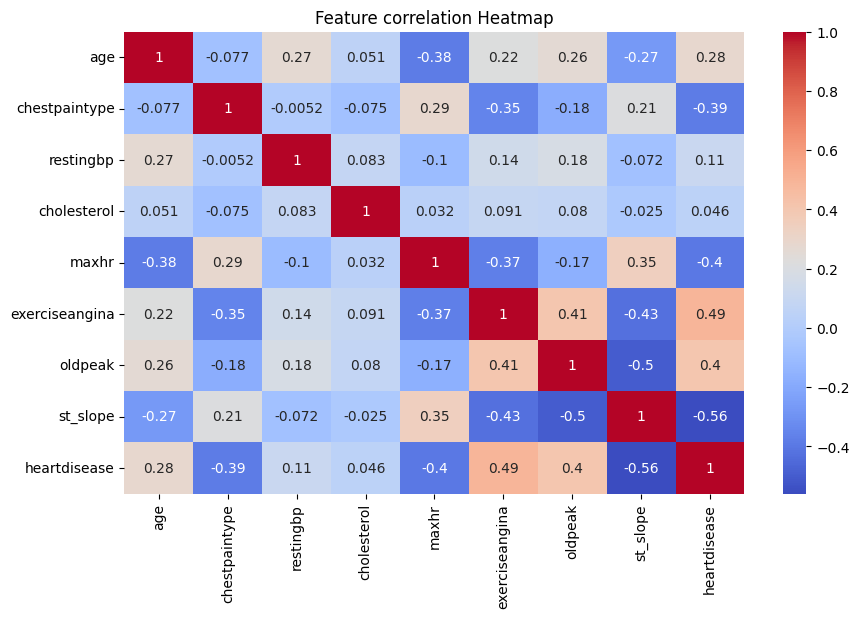

In [45]:
corr_data=data_df.drop(columns=['sex', 'fastingbs', 'restingecg'])
plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr(),annot=True,cmap='coolwarm')
plt.title("Feature correlation Heatmap")
plt.show()


Interpreatation
- Age has very strong correlation with each feature
- Each column shows how strongly a feature is correlated with heartdisease:

st_slope (-0.56)

Strong negative correlation with heart disease.
Lower values of st_slope are associated with a higher likelihood of heart disease.

exerciseangina (+0.49)

Strong positive correlation.
If exerciseangina is present, the chance of heart disease increases.

oldpeak (+0.41)

Moderate positive correlation.
Higher oldpeak (ST depression) is associated with heart disease.

chestpaintype (-0.39)

Negative correlation means less typical chest pain might indicate higher risk.

maxhr (-0.40)

Higher maximum heart rate is associated with lower heart disease risk.

This makes sense since people with heart conditions may have lower heart rate tolerance.

Feature Importance + Experimentation

Train a Random Forest model and see which features contribute the most:

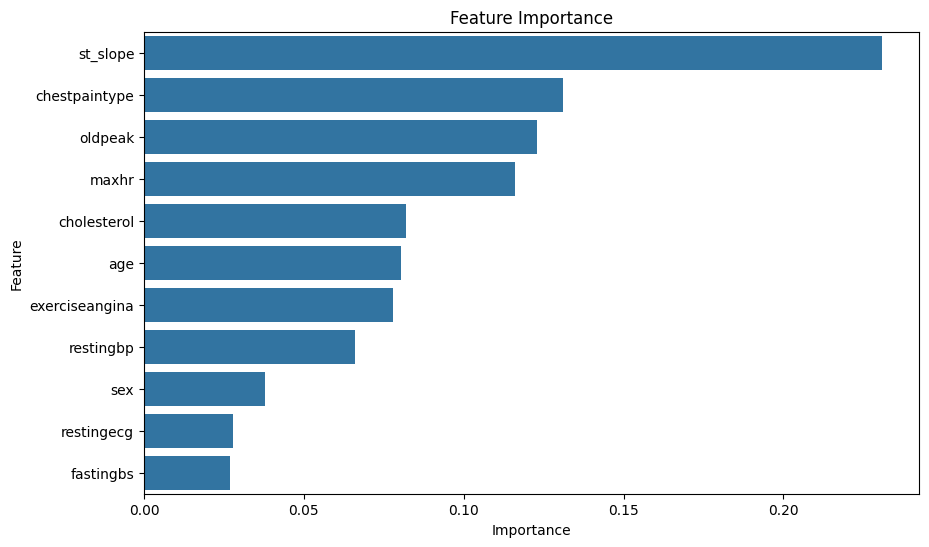

In [46]:
from sklearn.ensemble import RandomForestClassifier

x=data_df.drop(columns=['heartdisease'])
y=data_df['heartdisease']

model=RandomForestClassifier()
model.fit(x,y)

#get  the feature importance

feature_importance= pd.DataFrame({'Feature': x.columns,'Importance': model.feature_importances_})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(x=feature_importance['Importance'],y=feature_importance['Feature'])
plt.title('Feature Importance')
plt.show()

How Feature Importance is Calculated in Random Forest?

Each decision tree in the forest uses different features at different splits.

The model calculates how much each feature reduces uncertainty (reduces Gini impurity or entropy).

Features that help the model make better splits are given higher importance.

Imbalance dataset handling

In [47]:
data_df['heartdisease'].value_counts()

heartdisease
1    508
0    410
Name: count, dtype: int64

Model Buliding

1.1 Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

X=data_df.drop(columns=['heartdisease'])
Y=data_df['heartdisease']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((734, 11), (184, 11), (734,), (184,))

Train a Baseline model(logistics regression)

Trainig a baseline model helps in comparing against more complex models
- if a simple model performs better , then we may not need to train complex models

In [50]:
data_df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

baseline_model = LogisticRegression()
baseline_model.fit(X_train,y_train)

#predictions
y_pred=baseline_model.predict(X_test)

#evaluation

print("Baseline Model - Logistics regression")
print(classification_report(y_test,y_pred))

Baseline Model - Logistics regression
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Overall Accuracy: 85% ✅

High Precision for Heart Disease (0.91) → Fewer false positives. ✅

Recall for Heart Disease (0.82) can be improved → Some cases are missed. ⚠

Consider class imbalance & threshold tuning for better recall.

In [52]:
test_cases=np.array([
    [45, 120, 200, 0, 160, 1.2, 1],  # No Heart Disease
    [60, 140, 300, 1, 140, 2.5, 2],  # Likely Heart Disease
    [50, 130, 220, 1, 155, 0.8, 1]   # Borderline Case
    ])

Case 1: Male, 60 Years, Hypertension, High Cholesterol, Chest Pain

In [64]:
test_case_1 = np.array([[60, 1, 3, 145, 280, 1, 2, 130, 1, 2.3, 2]])  
# Features: [age, sex, chestpaintype, restingbp, cholesterol, fastingbs, restingecg, maxhr, exerciseangina, oldpeak, st_slope]


# Predict using the trained model
prediction = baseline_model.predict(test_case_1)

# Output the prediction result
print("Predicted Class (0 = No Heart Disease, 1 = Heart Disease):", prediction[0])

Predicted Class (0 = No Heart Disease, 1 = Heart Disease): 0


c:\Users\LENOVO\Desktop\Disease Prediction\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Female, 68 Years, Diabetes, High BP, Prior ECG Issues

In [65]:
test_case_2 = np.array([[68, 0, 2, 160, 310, 1, 1, 120, 1, 1.8, 2]])
 
# Features: [age, sex, chestpaintype, restingbp, cholesterol, fastingbs, restingecg, maxhr, exerciseangina, oldpeak, st_slope]


# Predict using the trained model
prediction = baseline_model.predict(test_case_2)

# Output the prediction result
print("Predicted Class (0 = No Heart Disease, 1 = Heart Disease):", prediction[0])

Predicted Class (0 = No Heart Disease, 1 = Heart Disease): 0


c:\Users\LENOVO\Desktop\Disease Prediction\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


 Case 3: 55-Year-Old Smoker, Obese, High Blood Pressure

In [66]:
test_case_3 = np.array([[55, 1, 3, 150, 290, 1, 1, 140, 1, 2.0, 2]])

# Predict using the trained model
prediction = baseline_model.predict(test_case_3)

# Output the prediction result
print("Predicted Class (0 = No Heart Disease, 1 = Heart Disease):", prediction[0])

Predicted Class (0 = No Heart Disease, 1 = Heart Disease): 0


c:\Users\LENOVO\Desktop\Disease Prediction\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
test_cases = np.array([
    [60, 1, 3, 145, 280, 1, 2, 130, 1, 2.3, 2],  # Case 1: 60-year-old Male, High BP, High Cholesterol
    [68, 0, 2, 160, 310, 1, 1, 120, 1, 1.8, 2],  # Case 2: 68-year-old Female, Diabetic, Prior ECG Issues
    [55, 1, 3, 150, 290, 1, 1, 140, 1, 2.0, 2]   # Case 3: 55-year-old Smoker, High BP, High Cholesterol
])

# # Apply the same feature scaling as in training
# test_cases_scaled = scaler.transform(test_cases)

# Predict outcomes
predictions = baseline_model.predict(test_cases)

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Test Case {i+1} Prediction: {'Heart Disease' if pred == 1 else 'No Heart Disease'}")


Test Case 1 Prediction: No Heart Disease
Test Case 2 Prediction: No Heart Disease
Test Case 3 Prediction: No Heart Disease


c:\Users\LENOVO\Desktop\Disease Prediction\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In the above test cases, the model has failed to predict the heart diesae patients, which will be a serious isssue here. The recall for the model is comparatively low.

For increase the recall, lets try to fit another model

Step 1: Use Oversampling (SMOTE) to balance the Dataset

In [ ]:
! pip install imblearn

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote=SMOTE(sampling_strategy='auto',random_state=42)

X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

#train the model on resampled data

model=RandomForestClassifier()

model.fit(X_train_resampled,y_train_resampled)

y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [68]:
test_cases = np.array([
    [60, 1, 3, 145, 280, 1, 2, 130, 1, 2.3, 2],  # Case 1: 60-year-old Male, High BP, High Cholesterol
    [68, 0, 2, 160, 310, 1, 1, 120, 1, 1.8, 2],  # Case 2: 68-year-old Female, Diabetic, Prior ECG Issues
    [55, 1, 3, 150, 290, 1, 1, 140, 1, 2.0, 2]   # Case 3: 55-year-old Smoker, High BP, High Cholesterol
])

# # Apply the same feature scaling as in training
# test_cases_scaled = scaler.transform(test_cases)

# Predict outcomes
predictions = model.predict(test_cases)

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Test Case {i+1} Prediction: {'Heart Disease' if pred == 1 else 'No Heart Disease'}")


Test Case 1 Prediction: Heart Disease
Test Case 2 Prediction: No Heart Disease
Test Case 3 Prediction: Heart Disease


c:\Users\LENOVO\Desktop\Disease Prediction\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
